# **Heteroscedasticity**

## Definition

Let $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ a sequence of random variables where variance of each term is $Var(\epsilon_i) = \sigma_i^2$

if $\sigma_i^2 \neq \sigma_j^2$ for *some* $(i, j) : i \neq j$ we conclude this sequence of random variables does not have constant variance and therefore the sequence is **heteroscedastic**.

## Description

In an OLS regression model where

$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ for $i = 0, 1, \ldots, n$

we assume the error terms $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ are iid and normally distributed with a mean of 0 and have constant variance, $\epsilon_i$ ~ $N(0, \sigma^2)$ for all $i$

If the assumption is true, then we say this sequence of error terms are **homoscedastic**. However, if the empirical data shows us that the variance of error terms are **not** constant, then we decide the sequence is **heteroscedastic**.

## Demonstration and Diagram

In [114]:
# Define our functions to create simulated values

import random
import matplotlib.pyplot as plt
random.seed(314)  # fix seed for reproducibility purposes

def genHetEpsilon(f, x):
    """Generates a normally distributed error term with mean 0 and variance a function of x,
    var(epsilon) = f(x)

    Args:
        f (function): a function to be applied on x
        x (float): represents an observation of a predictor variable X
    """
    var = f(x)
    return random.normalvariate(0, f(x)**0.5)

x_arr = [random.uniform(0, 100) for i in range(100)]

def genyValues(x_arr, f, beta_0, beta_1):
    """Generates y values as a linear function of x values 
    from x_arr with heteroscedastic error terms.
    
    y = beta_0 + beta_1 * x + epsilon

    Args:
        x_arr (list): a list of values, representing draws from a predictor variable X
        f (function): a function to be applied on x to generate variance of error terms
        beta_0 (float): intercept coefficient
        beta_1 (float): slope coefficient
    """
    return [beta_0 + beta_1*x + genHetEpsilon(f, x) for x in x_arr]

def plotOLS(x_arr):
    """Create a scatterplot of x_arr and fitted values

    Args:
        x_arr (list): an array of numbers
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x_arr, genyValues(x_arr, lambda x: x**2, 10, 1), label=r"$(x_i, y_i): y_i = \beta_0 + \beta_1 x_i + \epsilon_i$")
    ax.set(title="OLS Scatterplot with Heteroscedasticity")
    ax.set_xlabel(r"$x_i$", fontsize=16)
    ax.set_ylabel(r"$y_i$", fontsize=16)
    ax.legend()
    return fig, ax

(<Figure size 720x432 with 1 Axes>,
 <Axes: title={'center': 'OLS Scatterplot with Heteroscedasticity'}, xlabel='$x_i$', ylabel='$y_i$'>)

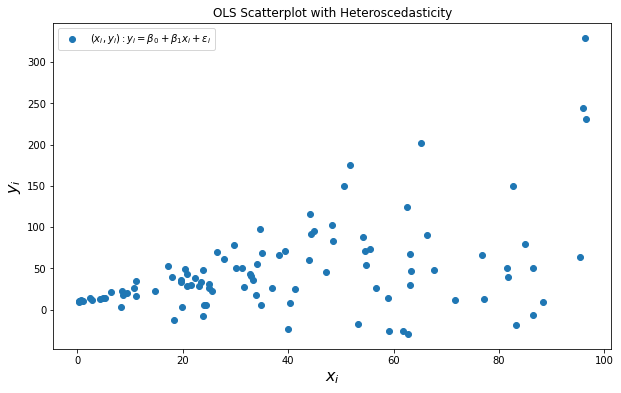

In [115]:
random.seed(314)  # fix seed for reproducibility purposes

# Generate an array of uniform draws between 0 and 100, of length 100 to simulate data; then print
x_arr = [random.uniform(0, 100) for i in range(100)]

# Plot our values where x values are draws from an independent standard uniform variable X
# and y values are draws from a random variable Y where Y_i = beta_0 + beta_1 X_i + epsilon_i
plotOLS(x_arr)

As we can see, because we defined the variance of simulated error terms as $Var(\epsilon_i) = x_i^2$, our data has **heteroscedasticity**, showing increasing $Y_i$ variance with increasing $x_i$ values.

Therefore, $Var(Y_i)$ has a **monotonic** relationship with $x_i^2$

## Diagnosis

To decide whether our sequence of random variables is homoscedastic or **heteroscedastic**, we have several options available.

* **Scatterplot inspection:** First, while doing an exploratory data analysis, we can just scatterplot the $y$ values against $x$ values and generate a visual. By inspecting the plot, if we observe a cone-like distribution of points, that is spread between points increases with increasing $x$ values, we decide that this distribution of $y$ values show **heteroscedasticity**. However, this method is a little bit subjective and informal.

* **Breusch-Pagan Test:** The Breusch-Pagan test is used in statistics to test for **heteroscedasticity** in a linear regression model. This is a chi-square test which assumes variance of error terms $\sigma^2_i$ have a **linear** relationship with independent variable values $x_i$. Its testing the hypotheses where:

$\qquad H_0:$ The sequence of error terms is **homoscedastic**

$\qquad H_1:$ The sequence of error terms is **heteroscedastic**

$\qquad$ Therefore after conducting the test, if $p < 0.05$, we reject the null hypothesis and decide the sequence of error terms is **heteroscedastic**.

In [116]:
# Import libraries
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import pandas as pd
import numpy as np
random.seed(314)  # fix seed for reproducibility purposes

# Generate an array of uniform draws between 0 and 100, of length 50 to simulate data; then print
x_arr = [random.uniform(0, 100) for i in range(100)]

# Generate simulated y values with beta_0 = 10 and beta_1 = 1, just like above plot
y_arr = genyValues(x_arr, lambda x: x**2, 10, 1)

# Combine them into a dataframe
df = pd.DataFrame(np.array([x_arr, y_arr]).transpose(), columns=["x", "y"])
df.head()

,x,y
0,19.643128,33.130547
1,11.146576,34.833423
2,0.263876,10.254256
3,62.813608,-30.016804
4,23.423162,33.160611


In [117]:
# Fit an OLS model to our dataframe
model = smf.ols("y ~ x", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     25.38
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.15e-06
Time:                        11:58:41   Log-Likelihood:                -534.67
No. Observations:                 100   AIC:                             1073.
Df Residuals:                      98   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0287      9.245      0.977      0.331      -9.318      27.375
x              0.9770      0.194      5.038      0.000       0.592       1.362
==============================================================================
Omnibus:                       31.222   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.790
Skew:                           1.083   Prob(JB):                     1.05e-18
Kurtosis:                       6.896   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Breusch-Pagan test

# Name our result parameters for the test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]

# Fit residuals (random draws of epsilon) against our exogenous variable x values with Breusch-Pagan
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Construct a dataframe of results
pd.DataFrame(test, index=name, columns=["Values"])

,Values
Lagrange multiplier statistic,2.688072e+01
p-value,2.164071e-07
f-value,3.602758e+01
f p-value,3.288120e-08


Because $p << 0.05$, we decide with significant confidence that our error terms **does not** have equal variances and our data shows **heteroscedasticity**.

## Damage

Not accounting for **heteroscedastic** error terms and wrongly assuming all of them have the same variance may result in significant problems:

* **Poor Model Fit and Predictive Power:** A model that assumes homoscedasticity when the data is heteroscedastic may have poor explanatory and predictive power. This is because it may fail to capture the underlying structure and variability in the data.

* **Misleading Statistical Inference:** Standard statistical tests (like t-tests or F-tests) rely on assumptions of constant variance. Heteroscedasticity can lead to an underestimation or overestimation of the standard errors of coefficient estimates, resulting in misleading conclusions about the statistical significance of variables.

* **Inaccurate Estimations:** Models assuming homoscedasticity, such as OLS regression, may produce inefficient, biased, or inconsistent estimations of parameters. This inaccuracy can be particularly problematic in regression models, where heteroscedasticity can lead to biased and inconsistent estimates of regression coefficients.

* **Compromised Risk Assessment:** In financial contexts, where assessing and managing risk is crucial, heteroscedasticity often indicates that the risk (variance) changes over time or across different levels of an explanatory variable. Ignoring this can lead to underestimating or overestimating risk, which can have significant financial implications.

## Directions

After conducting a heteroscedasticity test such as **Breusch-Pagan** or **White** and deciding our data shows heteroscedasticity; we can move on to solve the problem.

A good way to handle heteroscedasticity is conducting a **Weighted Least Squares (WLS)** regression. In **WLS**, we can assign smaller weights to points where absolute value of the residuals are large (meaning error terms should have high variance) and assign larger weights to points where absolute value of the residuals are small. This means that the <u> weight $w_{i}$ will be inversely proportional to the variance of error term $Var(\epsilon_i)$ </u>:

$ \mathrm{Var}(\epsilon_{i}) = \sigma_{i}^{2} = \Large\frac{\sigma ^{2}}{w_{i}} $



Moreover, if we have a statistically significant $p$ value from a Breusch-Pagan test, we can estimate the variance of error terms $\hat{Var(\epsilon_i)} = \hat{\sigma_i^2}$ as a **linear function** of observed exogenous variable values where:

$\hat{\sigma_i^2} = \gamma_0 + \gamma_1 x_i$

To calculate our weight estimates, we first conduct an OLS regression and calculate our coefficient estimates $\beta_0, \beta_1$. We then fit our model and get residual values such that:

$r_i = y_i - \hat{y_i} = y_i - (\hat{\beta_0} + \hat{\beta_1} x_i) $

where $r_i$ is the residual value and $\hat{\beta_0}, \hat{\beta_1}$ are our coefficient estimates. Because we can think of $r_i^2$ as the observed value of the true variance $\sigma_i^2$, we can model residual values as a linear function of $x_i$ by using observed $r_i$ values from sample:

$ Var(\epsilon_i) = \sigma_i^2 = r_i^2 = \gamma_0 + \gamma_1 x_i + u_i$

where the objective function to be minimized is RSS: the residual sum of squares but here the residuals are $k_i = r_i^2 - \hat{r_i^2}$ and **not** the same with $r_i$.

$RSS(\beta_0, \beta_1) = \sum_{i=1}^n k_i^2 = \sum_{i=1}^n (r_i^2 - \hat{r_i^2})^2 = \sum_{i=1}^n (r_i^2 - (\gamma_0 + \gamma_1 x_i))^2 $

After we solve the minimization problem by setting the gradient to $\bm{0}$, we get $\hat{\gamma_0}, \hat{\gamma_1}$ coefficient estimates. Then:

$ \hat{r_i^2} = \hat{\gamma_0} + \hat{\gamma_1} x_i = \hat{\sigma_i^2} $

And thus we have our estimated $\sigma_i^2$ values. After this, we can choose a constant $\sigma_2$ such as $\sigma_2 = 1$ and calculate our weights $w_i$:

$w_i = \Large\frac{1}{\hat{\sigma_i^2}}$

After we have our weights, we fit our WLS regression model such that our objective function to minimize is the following weighted residual sum of squares:

$ RSS(\beta_0, \beta_1) = \sum_{i=1}^n w_i r_i^2 = \sum_{i=1}^n w_i (y_i - (\beta_0 + \beta_1 x_i))^2 $

Solving the minimization problem, we get new $\hat{\beta_0}, \hat{\beta_1}$ coefficient estimates for our WLS model and complete our fitting with the linear regression function:

$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i $

We can do all of these steps in Python using statsmodels module:

In [119]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import random

In [120]:
random.seed(314)  # fix seed for reproducibility purposes
# Generate the same x and y values we used for Breusch-Pagan test
x_arr = [random.uniform(0, 100) for i in range(100)]
y_arr = genyValues(x_arr, lambda x: x**2, 10, 1)

# Combine them into a dataframe
df = pd.DataFrame(np.array([x_arr, y_arr]).transpose(), columns=["x", "y"])
df.head()

,x,y
0,19.643128,33.130547
1,11.146576,34.833423
2,0.263876,10.254256
3,62.813608,-30.016804
4,23.423162,33.160611


In [121]:
# Preliminary OLS regression to get residuals for weights
model_ols = smf.ols("y ~ x", df).fit()
model_ols.summary()  # Note that R^2 = 0.206

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     25.38
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.15e-06
Time:                        11:58:41   Log-Likelihood:                -534.67
No. Observations:                 100   AIC:                             1073.
Df Residuals:                      98   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0287      9.245      0.977      0.331      -9.318      27.375
x              0.9770      0.194      5.038      0.000       0.592       1.362
==============================================================================
Omnibus:                       31.222   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.790
Skew:                           1.083   Prob(JB):                     1.05e-18
Kurtosis:                       6.896   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# Add our newly created residuals to dataframe

# transforming by adding small constant (to avoid log of zero) and taking log
df["logresid2"] = np.log(model_ols.resid ** 2 + 0.001)

# Fit squared residuals against x values to estimate error term variance sigma^2
model_estsigma2 = smf.ols("logresid2 ~ x", df).fit()

# Get predicted var(e_i) values
df["estimated_sigma2"] = np.exp(model_estsigma2.fittedvalues)

# Create weights array with w_i = 1/r_i^2, 
# where r_i^2 is our estimate of error term variance sigma_i^2
df["weights"] = df["estimated_sigma2"] ** -1

# Print dataframe
df.head()

,x,y,logresid2,estimated_sigma2,weights
0,19.643128,33.130547,3.183057,25.727369,0.038869
1,11.146576,34.833423,5.404721,11.740868,0.085173
2,0.263876,10.254256,-0.064553,4.298581,0.232635
3,62.813608,-30.016804,9.218569,1384.993086,0.000722
4,23.423162,33.160611,0.444124,36.472655,0.027418


In [123]:
# Fit a WLS regression with our newly calculated weights
model_wls = sm.WLS(df["y"], sm.add_constant(df["x"]), df["weights"]).fit()
model_wls.summary()  # Note improved R^2 = 0.406

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.406
Model:                            WLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     66.85
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.06e-12
Time:                        11:58:41   Log-Likelihood:                -488.36
No. Observations:                 100   AIC:                             980.7
Df Residuals:                      98   BIC:                             985.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6326      1.751      5.500      0.000       6.157      13.108
x              1.0041      0.123      8.176      0.000       0.760       1.248
==============================================================================
Omnibus:                        6.742   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.369
Skew:                          -0.397   Prob(JB):                       0.0251
Kurtosis:                       4.067   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

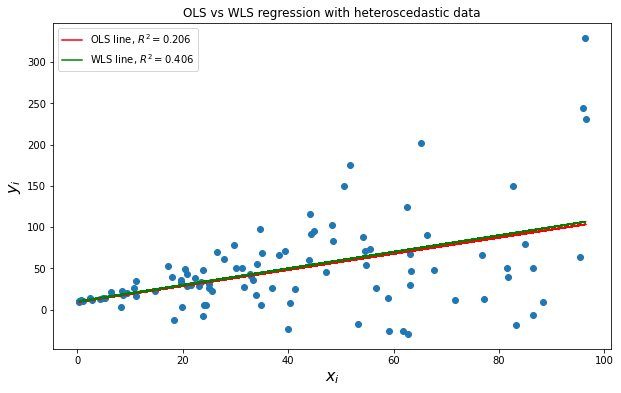

In [124]:
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["x"], df["y"])
ax.plot(df["x"], model_ols.params["Intercept"] + model_ols.params["x"]*df["x"], "r-", label="OLS line, $R^2 = 0.206$")
ax.plot(df["x"], model_wls.params["const"] + model_wls.params["x"]*df["x"], "g-", label="WLS line, $R^2 = 0.406$")
ax.set_title("OLS vs WLS regression with heteroscedastic data")
ax.set_xlabel("$x_i$", fontsize=16)
ax.set_ylabel("$y_i$", fontsize=16)
ax.legend()


As we can see, by using **WLS** instead of **OLS**, we managed to improve our $R^2$ value significantly; thus handling the problem of heteroscedasticity.